In [1]:
NAME = "Yin Qiu"

---

# Lab 6: Skip Gram

**Please read the following instructions very carefully**

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments) 
- The type of question and the points they carry are indicated in each question cell
- To avoid any ambiguity, each question also specifies what *value* must be set. Note that these are dummy values and not the answers
- If an autograded question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- You can delete the `raise NotImplementedError()`
- **Submitting the assignment** : Download the '.ipynb' file from Colab and upload it to bcourses. Do not delete any outputs from cells before submitting.
- That's about it. Happy coding!


Available software:
 - Python's Gensim module: https://radimrehurek.com/gensim/ (install using pip)
 - Sklearn’s  TSNE module in case you use TSNE to reduce dimension (optional)
 - Python’s Matplotlib (optional)

_Note: The most important hyper parameters of skip-gram/CBOW are vector size and windows size_


In [2]:
!pip install gensim
!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 


import pandas as pd
import numpy as np 
import gensim



File ‘GoogleNews-vectors-negative300.bin.gz’ already there; not retrieving.



### **Q1 (1 point)** 
Find the cosine similarity between the following word pairs

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [4]:
word_pairs = [('France', 'England'),
              ('smaller', 'bigger'),
              ('England', 'London'),
              ('France', 'Rocket'),
              ('big', 'bigger')]
similarities = []
for pair in word_pairs:
  similarities.append(model.similarity(pair[0], pair[1]))
print(similarities)

[0.39804944, 0.7302272, 0.43992856, 0.07114174, 0.68423855]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [5]:
#Replace 0 with the code / value; Do not delete this cell
similarity_pair1 = similarities[0]
similarity_pair2 = similarities[1]
similarity_pair3 = similarities[2]
similarity_pair4 = similarities[3]
similarity_pair5 = similarities[4]



In [6]:
#This is an autograded cell, do not edit/delete
print(similarity_pair1, similarity_pair2, similarity_pair3, similarity_pair4, similarity_pair5)

0.39804944 0.7302272 0.43992856 0.07114174 0.68423855


### **Q2 (1 point)** 
Write an expression to extract the vector representations of the words: 

- France
- England
- smaller
- bigger
- rocket
- big

Get only the first 5 elements for each vector representation.

In [7]:
word_vectors = model.wv
lst_words = ['France', 'England', 'smaller', 'bigger', 'rocket', 'big']
wordrep_5 = []
for word in lst_words:
  wordrep_5.append(word_vectors[word][:5])
print(wordrep_5)

[array([0.04858398, 0.07861328, 0.32421875, 0.03491211, 0.07714844],
      dtype=float32), array([-0.19824219,  0.11523438,  0.0625    , -0.05834961,  0.2265625 ],
      dtype=float32), array([-0.05004883,  0.03417969, -0.0703125 ,  0.17578125,  0.00689697],
      dtype=float32), array([-0.06542969, -0.09521484, -0.06225586,  0.16210938,  0.01989746],
      dtype=float32), array([-0.03198242,  0.27148438, -0.2890625 , -0.15429688,  0.16894531],
      dtype=float32), array([ 0.11132812,  0.10595703, -0.07373047,  0.18847656,  0.07666016],
      dtype=float32)]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [8]:
#Replace 0 with the code / value to get the first 5 elements of each vector; Do not delete this cell
vector_1 = wordrep_5[0]
vector_2 = wordrep_5[1]
vector_3 = wordrep_5[2]
vector_4 = wordrep_5[3]
vector_5 = wordrep_5[4]
vector_6 = wordrep_5[5]



In [9]:
#This is an autograded cell, do not edit/delete
print(vector_1)
print(vector_2)
print(vector_3)
print(vector_4)
print(vector_5)
print(vector_6)


[0.04858398 0.07861328 0.32421875 0.03491211 0.07714844]
[-0.19824219  0.11523438  0.0625     -0.05834961  0.2265625 ]
[-0.05004883  0.03417969 -0.0703125   0.17578125  0.00689697]
[-0.06542969 -0.09521484 -0.06225586  0.16210938  0.01989746]
[-0.03198242  0.27148438 -0.2890625  -0.15429688  0.16894531]
[ 0.11132812  0.10595703 -0.07373047  0.18847656  0.07666016]


### **Q3 (1 point)** 
Find the euclidean distances between the word pairs : 

- (France, England)
- (smaller, bigger)
- (England, London)
- (France, Rocket)
- (big, bigger)


In [10]:
def euclidean_dist(pair):
  a = pair[0]
  b = pair[1]
  d = word_vectors[a] - word_vectors[b]
  return np.linalg.norm(d)

word_pairs = [('France', 'England'),
              ('smaller', 'bigger'),
              ('England', 'London'),
              ('France', 'Rocket'),
              ('big', 'bigger')]
eu_dists = []
for pair in word_pairs:
  eu_dists.append(euclidean_dist(pair))

print(eu_dists)


[3.0151067, 1.8618743, 2.8752837, 3.892071, 1.9586496]


In [11]:
#Replace 0 with the code / value; Do not delete this cell
eu_dist1 = eu_dists[0]
eu_dist2 = eu_dists[1]
eu_dist3 = eu_dists[2]
eu_dist4 = eu_dists[3]
eu_dist5 = eu_dists[4]



In [12]:
#This is an autograded cell, do not edit / delete
print(eu_dist1)
print(eu_dist2)
print(eu_dist3)
print(eu_dist4)
print(eu_dist5)


3.0151067
1.8618743
2.8752837
3.892071
1.9586496


### **Q4 (1 point)**
Time to dabble with the power of Word2Vec. Find the 2 closest words  for the following conditions:  
- (King - Man + Queen)
- (bigger - big + small)
- (man + programmer - woman)
- (waiting - wait + run)
- (Texas + Milwaukee – Wisconsin)

In [13]:
def mostsimilar2(positive, negative):
  return model.most_similar(positive=positive, negative=negative, topn=2)

closest1 = mostsimilar2(['King', 'Queen'], ['Man'])
closest2 = mostsimilar2(['bigger', 'small'], ['big'])
closest3 = mostsimilar2(['man', 'programmer'], ['woman'])
closest4 = mostsimilar2(['waiting', 'run'], ['wait'])
closest5 = mostsimilar2(['Texas', 'Milwaukee'], ['Wisconsin'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [14]:
#Replace 0 with the code / value; Do not delete this cell
closest1 = closest1
closest2 = closest2
closest3 = closest3
closest4 = closest4
closest5 = closest5



In [15]:
#This is an autograded cell, do not edit/delete
print(closest1)
print(closest2)
print(closest3)
print(closest4)
print(closest5)


[('Queen_Elizabeth', 0.5257916450500488), ('monarch', 0.5004087090492249)]
[('larger', 0.7402471899986267), ('smaller', 0.732999324798584)]
[('programer', 0.5371963977813721), ('programmers', 0.5310999155044556)]
[('running', 0.5654535889625549), ('runs', 0.49640005826950073)]
[('Houston', 0.7767744064331055), ('Fort_Worth', 0.7270511388778687)]


### **Q5 (3 points)**
Using the vectors for the words in the Google News dataset, explore the semantic representation of these words through K-means clustering and explain your findings.

*Note : Since there are ~3Mil words in the vocabulary, you can downsample it to ~20-30k randomly selected words*

**Do not delete the below cell**

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [17]:
# parse the words to a list, and randomly select 30k of them for clustering
keys = word_vectors.index2entity
keys = np.random.choice(a=keys, size=30000, replace=False) # randomly select 30000 unique words from the 3 mil words
keys.shape

(30000,)

In [18]:
# use the downsized word vectors to train the kmeans model
new_wv = word_vectors[keys]

# iterate from 2 to 10 to find best k
K = range(2,11)
scores = []
for k in K:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(new_wv)
  score = silhouette_score(new_wv, kmeans.labels_) # use silhouette score as metric, higher the better
  scores.append(score)

max_index = scores.index(max(scores))
best_k = max_index+2
print(best_k)

2


In [19]:
# run the kmeans again with the best k of 2
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(new_wv)
labels = kmeans_best.labels_
centers = kmeans_best.cluster_centers_
centers.shape

(2, 300)

In [20]:
# silhouette score
silhouette_score(new_wv, kmeans_best.labels_)

0.22099033

**The silhouette score is supposed to be in -1 to 1. The larger the better. The score for kmeans model when k=2 is only 0.22, which tell us the ratio of intra-cluster distances to inter-cluster distances is about 1/5. It's not very good but still acceptable.**

In [21]:
# number of words assigned to each cluster
(cluster, counts) = np.unique(kmeans_best.labels_, return_counts=True)
print(dict(zip(cluster, counts)))

{0: 6535, 1: 23465}


**It appears the majority of words were assigned to cluster 2. For such a big data set and a very small k=2, the imbalanced assignment to cluters may tell us this clustering is not very meaningful. We will check further below.**

In [22]:
# find the 10 most similar words by vector to centroids in cluster 1 and cluster 2
close_clu1 = model.similar_by_vector(vector=centers[0], topn=10)
close_clu2 = model.similar_by_vector(vector=centers[1], topn=10)

# print the 10 similar words in each cluster and respective cosine similarity
for word in close_clu1:
  print(word)
print('\n')
for word in close_clu2:
  print(word)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


('Emil_Protalinski_Published', 0.921833872795105)
('BY_GEOFF_KOHL', 0.9181613922119141)
('By_HuDie_####-##-##', 0.9180119037628174)
('By_QianMian_####-##-##', 0.9176564812660217)
('By_XiaoBing_####-##-##', 0.9153998494148254)
('BY_DANNY_GALLAGHER', 0.9119837880134583)
('STACY_LEE', 0.9116851687431335)
('By_Riva_Froymovich', 0.9110938310623169)
('FOOD_OOH_IT', 0.9097460508346558)
('REYNOLDS_GALLERY', 0.9086400270462036)


('http_dol##.net_index###.html_http', 0.919137179851532)
('dol##.net_index####.html_http_dol##.net', 0.9089906215667725)
('index###.html_http_dol##.net_index###.html', 0.9079704880714417)
('Deltagen_undertakes', 0.9057775735855103)
('By_TRICIA_SCRUGGS', 0.9044997692108154)
('BY_STEFANIE_WHITE', 0.9023382663726807)
('SIX_ROG_VX', 0.8988419771194458)
('http_dol##.net_index####.html_http', 0.8984336853027344)
('PRESCRIPTION_DRUGS_Gradually', 0.8980013132095337)
('under_CorMedix_collaborations', 0.8979905247688293)


**I found the best k for k-means clustering is 2, using silhouette score. With each of the 2 clusters, I printed the the 10 most similar vectors to the centroid. There is no clear pattern to me in each cluster. I can hypothetically think that the words in the first cluster are relevant to http address and corporate name, and the words in the second cluster are relevant to personal signature and publication series code. However, this is just a hypothesis and needs to be confirmed with further exploration.**

### **Q6 (1 point)**
What loss function does the skipgram model use and briefly describe what this function is minimizing.

**Do not delete the below cell**

**The loss function for skip-gram algorithm is corss entropy， which is used to measure the negative sum of the predicted probability distribution of the output of softmax. When the output of softmax y_j is close to 1 then log(y_j) in C is close to 0; when y_j is less than 1, -log(y_j) will be larger than 1, making the loss function C larger. We would like to minimize the divergence of predicted probability distribution, so that it will be close to the "target" probability distribution (t_j), where the correct class is 1 and everything else is 0. We have t_j times the log(y_j) to keep only the correct class. So minimizing C towards 0 means we have higher predicted probability to the correct output words.**

### **Bonus Question (1 point)** 
Find at least 2 interesting word vec combinations like the ones given in Q4

**Do not delete the below cell**

In [23]:
funwordpair1 = mostsimilar2(['happy','joy'], ['sad'])
print(funwordpair1)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sheer_joy', 0.5615313053131104), ('delight', 0.5426716208457947)]


In [24]:
funwordpair2 = mostsimilar2(['California', 'Hollywood'], ['tech'])
print(funwordpair2)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('Southern_California', 0.600623369216919), ('Los_Angeles', 0.5748981237411499)]


#**Lab 6 Part 2**
1. Generate embeddings from the corpus you have chosen

In [25]:
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
# Preprocessing data: The Project Gutenberg EBook of Alice’s Adventures in Wonderland, by Lewis Carroll
from urllib.request import urlopen
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = urlopen(url)
raw = response.read().decode('utf8')

In [27]:
# regexp tokenize
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(raw, pattern))
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

In [28]:
tokenized_raw[:10]

['The Project Gutenberg EBook of Alice s Adventures in Wonderland , by Lewis Carroll This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever .',
 'You may copy it , give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www .',
 'gutenberg .',
 'org .',
 "If you are not located in the United States , you'll have to check the laws of the country where you are located before using this ebook .",
 'Title : Alice s Adventures in Wonderland Author : Lewis Carroll Release Date : June 25 , 2008 [ EBook 11 ] [ Most recently updated : October 12 , 2020 ] Language : English Character set encoding : UTF-8 * * * START OF THIS PROJECT GUTENBERG EBOOK ALICE S ADVENTURES IN WONDERLAND * * * Produced by Arthur DiBianca and David Widger [ Illustration ] Alice s Adventures in Wonderland by Lewis Carroll THE MILLENNIUM FULCRUM EDITION 3 .',
 '0 Conten

In [29]:
# normalize the text
# remove punctuations
import string
nopunct = []
for sent in tokenized_raw:
  _ = [w for w in sent.split() if w not in string.punctuation]
  nopunct.append(" ".join(_))

In [30]:
# word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]
tok_corp[:3]

[['The',
  'Project',
  'Gutenberg',
  'EBook',
  'of',
  'Alice',
  's',
  'Adventures',
  'in',
  'Wonderland',
  'by',
  'Lewis',
  'Carroll',
  'This',
  'eBook',
  'is',
  'for',
  'the',
  'use',
  'of',
  'anyone',
  'anywhere',
  'in',
  'the',
  'United',
  'States',
  'and',
  'most',
  'other',
  'parts',
  'of',
  'the',
  'world',
  'at',
  'no',
  'cost',
  'and',
  'with',
  'almost',
  'no',
  'restrictions',
  'whatsoever'],
 ['You',
  'may',
  'copy',
  'it',
  'give',
  'it',
  'away',
  'or',
  're-use',
  'it',
  'under',
  'the',
  'terms',
  'of',
  'the',
  'Project',
  'Gutenberg',
  'License',
  'included',
  'with',
  'this',
  'eBook',
  'or',
  'online',
  'at',
  'www'],
 ['gutenberg']]

In [31]:
# create a list of unique words
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

3595

In [32]:
# already loaded pre-trained word2vec from Google; include relationships
# test for similarity
print(model.most_similar(positive=['woman', 'king'], negative=['man']))

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('queen', 0.7118192911148071), ('monarch', 0.6189674139022827), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.518113374710083), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411999702454)]


In [33]:
# training gensim with Alice's Adventures in Wonderland
'''min_count: accept a word if it has a certain minimum number of occurances in the document

Size: Size of the vector

Window size : The parameter that fixes the length of window of words by which the model sweeps the data'''

mymodel = gensim.models.Word2Vec(tok_corp, min_count=1, size=16, window=5)


In [34]:
# extract respective vectors corresponding to unique words
vector_list = mymodel[unique_words] # n by d matrix
np.array(vector_list).shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(3595, 16)

In [35]:
for i in range(5):
  print(unique_words[i], vector_list[i])

game [-0.11171378  0.13621463  0.02807499 -0.16291405  0.06786235  0.21353735
  0.05133482 -0.12409391 -0.02425975 -0.23999973  0.17469743 -0.07101544
 -0.00950043 -0.00850812  0.14209771  0.0150135 ]
caught [-2.9878469e-02  3.6855906e-02  1.9546090e-02 -8.8436931e-02
  8.1825722e-03  7.4626453e-02  3.3661615e-02 -3.8814589e-02
 -2.4287255e-02 -7.1850218e-02  6.2350024e-02 -4.4843047e-03
 -5.2177722e-05  1.1366536e-02  2.6786439e-02  3.4182079e-02]
machines [-0.0563659   0.03986408  0.02807083 -0.07677287  0.02669321  0.03834646
 -0.01147405 -0.05575945  0.02020124 -0.03784942  0.07934498 -0.0010822
 -0.02355767  0.02436827  0.05132861  0.00954647]
eyes [-0.36215594  0.44493383  0.16843915 -0.6023899   0.23618697  0.71400535
  0.16094933 -0.47627765 -0.01540328 -0.83771783  0.67530185 -0.2051067
  0.00227144 -0.09742682  0.43200186  0.10002971]
timidly [-0.11645633  0.12195393  0.02506814 -0.19535519  0.05280521  0.18853493
  0.03636974 -0.16138597 -0.02545288 -0.24738058  0.2062136  -

2. Based on your knowledge and understand of the text corpus you have chosen, form 3 hypotheses of analogies or relationships you expect will hold and give a reason why. Experimentally validate these hypotheses. (e.g., if using Moby Dick as the corpus, one hypothesis might be that the whale, "Mobie Dick" is (cosine) more similar to "good" than to "evil" and is more similar to "opposition" than to "mystery")

In [36]:
'''Hypothesis 1: Alice is more similar to curious than to safe
    Reason: Alice is a very curious girl and never play safe'''
print('Alice and curious similarity:', mymodel.wv.similarity('Alice', 'curious'))
print('Alice and safe similarity', mymodel.wv.similarity('Alice', 'safe'))


Alice and curious similarity: 0.9979525
Alice and safe similarity 0.8793081


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [37]:
'''Hypothesis 2: Queen of Hearts is more similar to off than to laugh
    Reason: Queen is a blind furry character that likes to say off with his/her head, and she seldom laughs '''
print('Queen and off similarity:', mymodel.wv.similarity('Queen', 'off'))
print('Queen and laugh similarity', mymodel.wv.similarity('Queen', 'laugh'))


Queen and off similarity: 0.9992827
Queen and laugh similarity 0.66836756


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [38]:
'''Hypothesis 3: Duchess is more similar to ugly than to pretty
    Reason: Duchess is ugly as described in the novel'''
print('Duchess and ugly similarity:', mymodel.wv.similarity('Alice', 'ugly'))
print('Duchess and pretty similarity', mymodel.wv.similarity('Alice', 'pretty'))


Duchess and ugly similarity: 0.9526028
Duchess and pretty similarity 0.06276158


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


3. Use T-SNE or PCA to reduce the dimensionality of the vectors to two dimensions for:

*   The GoogleNews corpus pre-trained vectors from Lab 6. Feel free to down sample this set of vectors to 10 - 20k words based on frequency.

*   The embeddings you just generated.

In [53]:
from sklearn.manifold import TSNE

# downsize word vectors from GoogleNews corpus to the most frequent 10k words
downsized_keys = word_vectors.index2entity[:10000]
downsized_wv = word_vectors[downsized_keys]


In [54]:
# GoogleNews corpus, reduce dim to 2
google_embed = TSNE(n_components=2, perplexity=50, verbose=2, method='barnes_hut').fit_transform(downsized_wv)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.450s...
[t-SNE] Computed neighbors for 10000 samples in 85.027s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.983153
[t-SNE] Computed conditional probabilities in 0.857s
[t-SNE] Iteration 50: error = 98.8484039, gradient norm = 0.1357405 (50 iterations in 8.081s)
[t-SNE] 

In [96]:
# Alice corpus, reduce dim to 2
alice_embed = TSNE(n_components=2, perplexity=80, verbose=2, method='barnes_hut').fit_transform(vector_list)

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 3595 samples in 0.010s...
[t-SNE] Computed neighbors for 3595 samples in 0.472s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3595
[t-SNE] Computed conditional probabilities for sample 2000 / 3595
[t-SNE] Computed conditional probabilities for sample 3000 / 3595
[t-SNE] Computed conditional probabilities for sample 3595 / 3595
[t-SNE] Mean sigma: 0.034417
[t-SNE] Computed conditional probabilities in 0.683s
[t-SNE] Iteration 50: error = 69.5417786, gradient norm = 0.0321016 (50 iterations in 3.313s)
[t-SNE] Iteration 100: error = 65.7973175, gradient norm = 0.0054351 (50 iterations in 2.200s)
[t-SNE] Iteration 150: error = 65.4730225, gradient norm = 0.0013915 (50 iterations in 1.878s)
[t-SNE] Iteration 200: error = 65.3841553, gradient norm = 0.0004211 (50 iterations in 1.775s)
[t-SNE] Iteration 250: error = 65.3576279, gradient norm = 0.0004107 (50 iterations in 1.750s)
[t-SNE] KL divergence after 250 iterat

4. Using this (Links to an external site.) library (or your choice of scatterplot library), visualize both reduced datasets from the step above and explore the visualization.

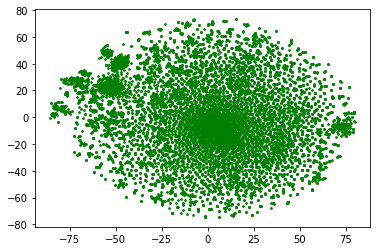

In [64]:
# first, use matplotlib to get the simple plots
import matplotlib.pyplot as plt
%matplotlib inline

# visualize google dataset
plt.scatter(x=google_embed[:,0], y=google_embed[:,1], s=3, c='green')
plt.show()

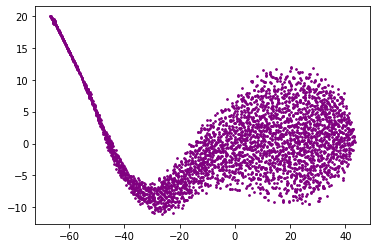

In [97]:
# visualize alice dataset
plt.scatter(x=alice_embed[:,0], y=alice_embed[:,1], s=3, c='purple')
plt.show()

In [52]:
# further, I try using the d3 library for visualization
from google.colab.output import eval_js
from IPython.display import Javascript
!git clone https://github.com/CAHLR/d3-scatterplot.git

Cloning into 'd3-scatterplot'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 1022 (delta 9), reused 1 (delta 0), pack-reused 1003
Receiving objects: 100% (1022/1022), 1.94 MiB | 1.94 MiB/s, done.
Resolving deltas: 100% (590/590), done.


In [56]:
def show_port(port, data_file, width=600, height=800):
  display(Javascript("""
  (async ()=>{
    fm = document.createElement('iframe')
    fm.src = await google.colab.kernel.proxyPort(%d) + '/index.html?dataset=%s'
    fm.width = '90%%'
    fm.height = '%d'
    fm.frameBorder = 0
    document.body.append(fm)
  })();
  """ % (port, data_file, height)))

In [58]:
# create a dataframe for google dataset, columns are x, y, and word_text
df_google = pd.DataFrame(data=google_embed, columns=['x', 'y'])
df_google['word_text'] = downsized_keys
df_google.head(5)

,x,y,word_text
0,2.251091,-6.725315,</s>
1,1.806505,-3.314204,in
2,3.737966,-4.093122,for
3,5.371419,-9.586966,that
4,20.320997,-14.191899,is


In [75]:
df_google.to_csv('google.tsv', sep='\t', index=False)

In [86]:
port = 8000
data_file = 'google.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

The above image for Google News dataset has shown a number of interesting clusters. For example, we find one cluster on upper left corder for the names of geographic regions in the US, such as cities and states. Another cluster closed to it shows the names for universities. Also, we can see two clusters respectively for first names and last names near the upper left. On the right side of the image, we find a cluster for many adverbs. At the lower center part, we also find some clusters for adjectives. At the upper center part, we find many words related to technologies and computers. These are all very interesting observations.

In [98]:
# create a dataframe for alice dataset, columns are x, y, and word_text
df_alice = pd.DataFrame(data=alice_embed, columns=['x', 'y'])
df_alice['word_text'] = unique_words
df_alice.head(5)

,x,y,word_text
0,-35.001778,-7.629823,game
1,1.951661,-0.263966,caught
2,6.835761,8.351313,machines
3,-57.847202,12.440156,eyes
4,-36.353607,-5.916276,timidly


In [99]:
df_alice.to_csv('alice.tsv', sep='\t', index=False)

In [102]:
port = 8000
data_file = 'alice.tsv'
height = 1600

get_ipython().system_raw('cd d3-scatterplot && python3 -m http.server %d &' % port) 
show_port(port, data_file, height)

<IPython.core.display.Javascript object>

The image for the Alice in Wonderland is not as meaningful as the Google News dataset. I've tried different perplexity and other parameters, but still haven't found any meaningful meaning for points that are clustered.